In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1,as_frame=False)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x, y = mnist['data'], mnist['target']

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
some_data = x[0]

In [8]:
import matplotlib.pyplot as plt

In [9]:
image = some_data.reshape(28, 28)

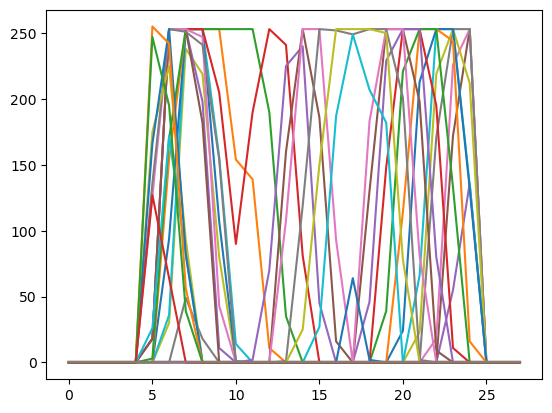

In [10]:
plt.plot(image)

In [11]:
plt.show()

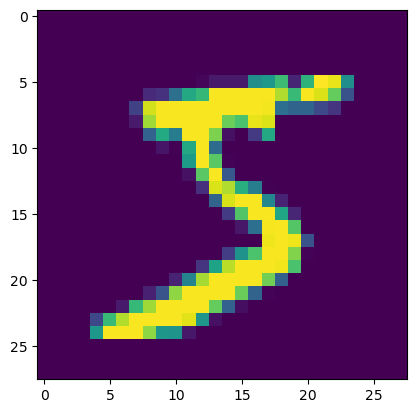

In [12]:
plt.imshow(image)

In [13]:
y[0]

'5'

In [14]:
import numpy as np
y = y.astype(np.uint8)

In [15]:
y[0]

5

In [16]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [18]:
y_train_5[1:5]

array([False, False, False, False])

In [19]:
from sklearn.linear_model import SGDClassifier

In [20]:
sgd = SGDClassifier(random_state = 42)

In [21]:
sgd.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [22]:
sgd.predict([some_data])

array([ True])

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(sgd, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
y_train_predict = cross_val_predict(sgd, x_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [29]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [30]:
numbers = confusion_matrix(y_train_5, y_train_predict)

In [31]:
numbers

array([[53892,   687],
       [ 1891,  3530]])

In [32]:
numbers[0][0]

53892

In [33]:
precision = numbers[1][1]/(numbers[1][1] + numbers[0][1])

In [34]:
precision

0.8370879772350012

In [35]:
from sklearn.metrics import precision_score, recall_score

In [36]:
precision_score(y_train_5, y_train_predict)

0.8370879772350012

In [37]:
recall_score(y_train_5, y_train_predict)

0.6511713705958311

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(y_train_5, y_train_predict)

0.7325171197343846

In [40]:
print(sgd.decision_function([some_data]))

[2164.22030239]


In [41]:
y_scores = sgd.decision_function(x_train)

In [42]:
y_scores

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

In [43]:
print(cross_val_predict(sgd, x_train, y_train_5, cv=3, method='decision_function'))

[  1200.93051237 -26883.79202424 -33072.03475406 ...  13272.12718981
  -7258.47203373 -16877.50840447]


In [44]:
y_scores = cross_val_predict(sgd, x_train, y_train_5, cv=3, method='decision_function')

In [45]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
precisions, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')

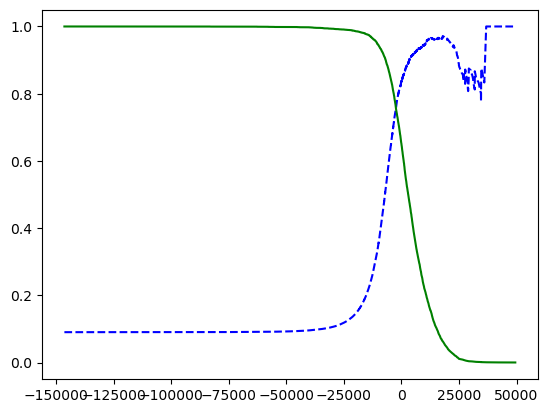

In [49]:
plot_precision_recall_vs_threshold(precisions, recall, thresholds)

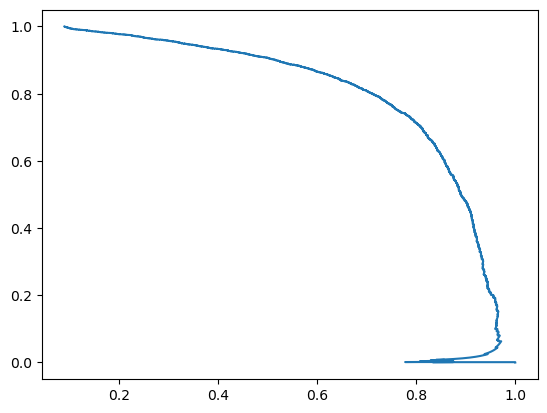

In [50]:
plt.plot(precisions, recall)

In [54]:
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]

In [55]:
y_train_predict_90 = (y_scores >= threshold_90_precision)

In [56]:
precision_score(y_train_5, y_train_predict_90)

0.9000345901072293

In [57]:
recall_score(y_train_5, y_train_predict_90)

0.4799852425751706

In [58]:
from sklearn.metrics import roc_curve

In [59]:
fpr, tpr, thresholds_roc = roc_curve(y_train_5, y_scores)

In [60]:
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')

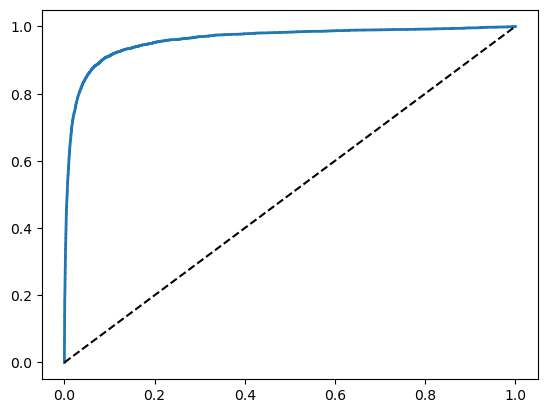

In [61]:
plot_roc_curve(fpr, tpr)

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

# RandomForestClassifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
forest_clf = RandomForestClassifier(random_state=42)

In [66]:
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method='predict_proba')

In [67]:
y_scores_forest = y_probas_forest[:, 1]

In [70]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

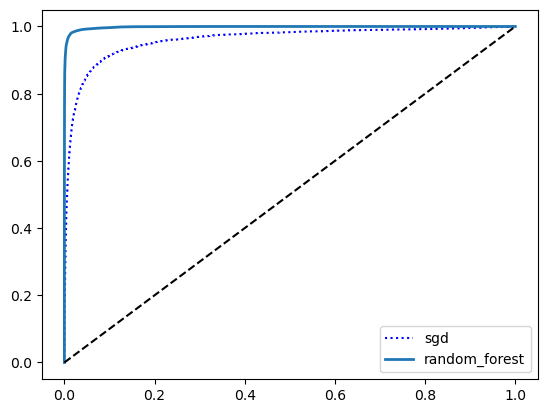

In [71]:
plt.plot(fpr, tpr, 'b:', label='sgd')
plot_roc_curve(fpr_forest, tpr_forest, 'random_forest')
plt.legend(loc='lower right')
plt.show()

In [72]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145